Original X shape: (150, 4)
Original y shape: (150,)
X shape (primeras 100): (100, 4)
y shape (primeras 100): (100,)
Mejor precisión: 100.0
Índice en 'alpha': 18
Mejor alpha: 0.0037036072144288577


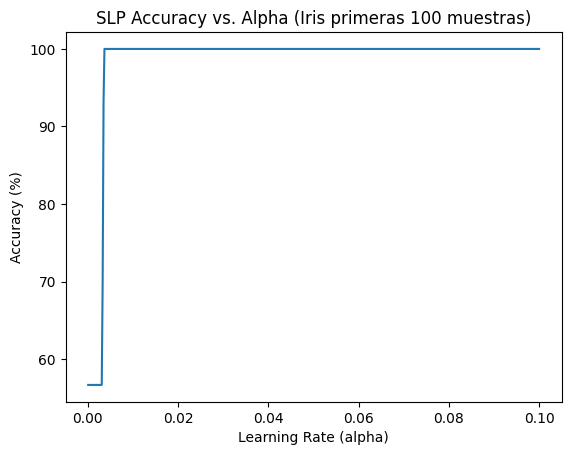

In [1]:
# =========================================================
# LISTING 3-1 (CORREGIDO): IMPLEMENTACIÓN SLP (FROM SCRATCH) - IRIS
# =========================================================

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# 1) Cargar dataset IRIS
Data = load_iris()
X = Data.data
y = Data.target

print("Original X shape:", X.shape)
print("Original y shape:", y.shape)

# 2) Seleccionar las primeras 100 muestras (para binario)
X = X[:100]
y = y[:100]

print("X shape (primeras 100):", X.shape)
print("y shape (primeras 100):", y.shape)

# 3) Inicializar pesos y bias
def init_(X):
    w = np.random.random(X.shape[1])  # tantas dimensiones como columnas
    b = np.random.random()
    return w, b

# 4) Normalización Min-Max
def normalise(X):
    maxv = np.max(X, axis=0)
    minv = np.min(X, axis=0)
    return (X - minv) / (maxv - minv)

# 5) Función de activación sigmoide
def f(x):
    return 1 / (1 + np.exp(-x))

# 6) Entrenamiento SLP
def train(X_train, y_train, w, b, alpha):
    """
    Entrena el modelo una pasada (una época) con tasa de aprendizaje alpha.
    Retorna pesos y bias actualizados.
    """
    for i in range(X_train.shape[0]):
        x = X_train[i, :]
        # Calcular salida
        u = np.sum(x * w) + b
        v = f(u)

        # Comparar con threshold = 0.5
        if v > 0.5:
            y_pred = 1
        else:
            y_pred = 0

        # Actualizar pesos y bias
        w = w - alpha * (y_pred - y_train[i]) * x
        b = b - alpha * (y_pred - y_train[i])

    return w, b

# 7) Testing SLP
def test(X_test, y_test, w, b):
    """
    Retorna la exactitud (accuracy) en el conjunto de prueba.
    """
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(X_test.shape[0]):
        x = X_test[i, :]
        u = np.sum(x * w) + b
        v = f(u)
        if v > 0.5:
            y_pred = 1
        else:
            y_pred = 0

        # Contabilizar TP, TN, FP, FN
        if (y_pred == 1 and y_test[i] == 1):
            tp += 1
        elif (y_pred == 0 and y_test[i] == 0):
            tn += 1
        elif (y_pred == 1 and y_test[i] == 0):
            fp += 1
        else:
            fn += 1

    accuracy = ((tp + tn) / (tp + tn + fp + fn)) * 100
    return accuracy

# 8) Preparar datos
X_Norm = normalise(X)  # normalizamos X
y_Norm = normalise(y)  # y pasa a [0,1], para 2 clases ~ (0 y 1)

# Inicializar pesos y bias
w, b = init_(X_Norm)

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X_Norm, y_Norm, test_size=0.3)

# 9) Bucle sobre alpha
result = []
alpha = np.linspace(0.0001, 0.1, 500)  # 500 valores de alpha

for lr in alpha:
    # Entrenamos una pasada con tasa de aprendizaje lr
    w, b = train(X_train, y_train, w, b, lr)
    acc = test(X_test, y_test, w, b)
    result.append(acc)

# 10) Hallar mejor alpha
best = np.max(result)
index = np.argmax(result)
print("Mejor precisión:", best)
print("Índice en 'alpha':", index)
print("Mejor alpha:", alpha[index])

# 11) Graficar
plt.plot(alpha, result)
plt.xlabel('Learning Rate (alpha)')
plt.ylabel('Accuracy (%)')
plt.title('SLP Accuracy vs. Alpha (Iris primeras 100 muestras)')
plt.show()


In [2]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
w

array([ 0.21617229, -0.01885095, -0.10159596,  0.82096143])

In [4]:
b

np.float64(-0.2726529839659403)

In [7]:
X.shape[1]

4